<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: A multivariate Eq. time-lon dataset</h1>

<h2>Scatter matrix after averaging longitude bins</h2>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">
#### Last edited March 2020 

In [20]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
# load file
data = xr.open_dataset('../data/Eq_timelon_sections.nc',decode_times=False)
print(data)

<xarray.Dataset>
Dimensions:  (lon: 144, time: 240)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
Data variables:
    olr      (time, lon) float32 ...
    precip   (time, lon) float32 ...
    slp      (time, lon) float32 ...
    sst      (time, lon) float32 ...
    uwnd     (time, lon) float32 ...


In [22]:
# load variable data from file
sst=data.sst
olr=data.olr
lon=data.lon
time=data.time
print(sst.shape,lon.shape,time.shape)

(240, 144) (144,) (240,)


### Can you find the El Ninos and La Ninas?

In [23]:
sst_anom = sst - sst.mean(dim='time')
print(sst_anom)

<xarray.DataArray 'sst' (time: 240, lon: 144)>
array([[ 0.871584,  1.160555,  1.139643, ...,  1.070618,  1.048704,  0.931259],
       [ 1.597586,  1.673555,  1.571642, ...,  1.427618,  1.623203,  1.60726 ],
       [ 2.129082,  1.866554,  1.592142, ...,  2.130619,  2.267202,  2.278259],
       ...,
       [-1.402914, -1.244444, -0.942858, ..., -1.213383, -1.546295, -1.474739],
       [-0.463413, -0.350445, -0.261862, ..., -0.72138 , -0.643795, -0.547743],
       [ 0.103588,  0.168556,  0.238642, ..., -0.072382,  0.094706,  0.156261]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...


In [24]:
# what does the time array look like?
print(time)

<xarray.DataArray 'time' (time: 240)>
array([  1.,   2.,   3., ..., 238., 239., 240.], dtype=float32)
Coordinates:
  * time     (time) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
Attributes:
    axis:       Y
    units:      months since 1982-01-01 00:00:00
    delta_t:    0000-01-00 00:00:00
    long_name:  Time


In [25]:
year_ticks = []
year=1982
for t in (time):
    if ((t-1) % 12 == 0): 
        year_ticks.append(str(year))
        year+=1
    #else:
    #    year_ticks.append('')
        
print(year_ticks,len(year_ticks))

['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001'] 20


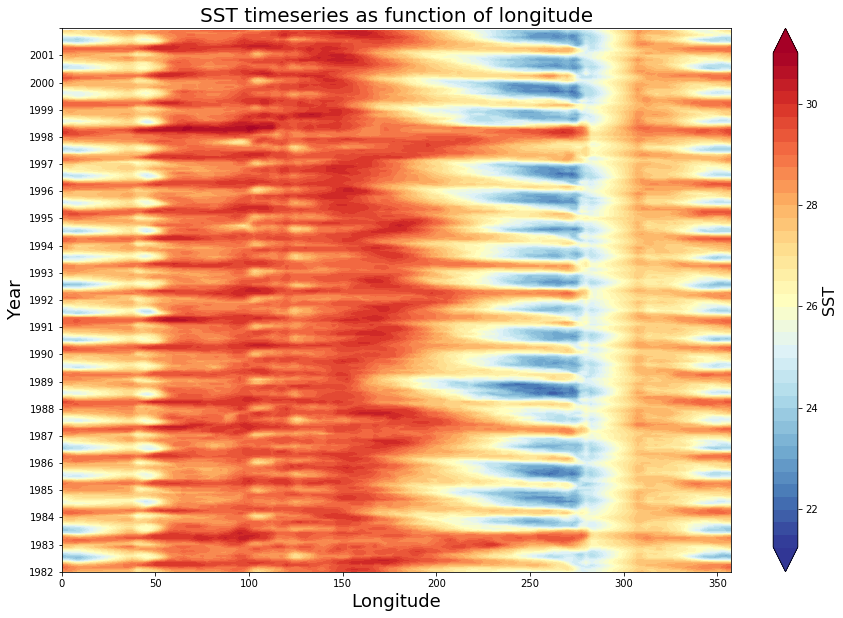

In [26]:
# plot timeseries of SST 
fig=plt.figure(figsize=[15,10])
ax=fig.add_subplot(111)
cs = ax.contourf(lon,time,sst,40,cmap='RdYlBu_r',extend='both')
cb = plt.colorbar(cs,ticks=np.arange(20,30+2,2))
cb.set_label('SST',fontsize=16)
ax.set_yticks(np.arange(1,240+12,12))
ax.set_yticklabels(year_ticks)
ax.set_title('SST timeseries as function of longitude',fontsize=20)
ax.set_ylabel('Year',fontsize=18)
ax.set_xlabel('Longitude',fontsize=18)
plt.show()

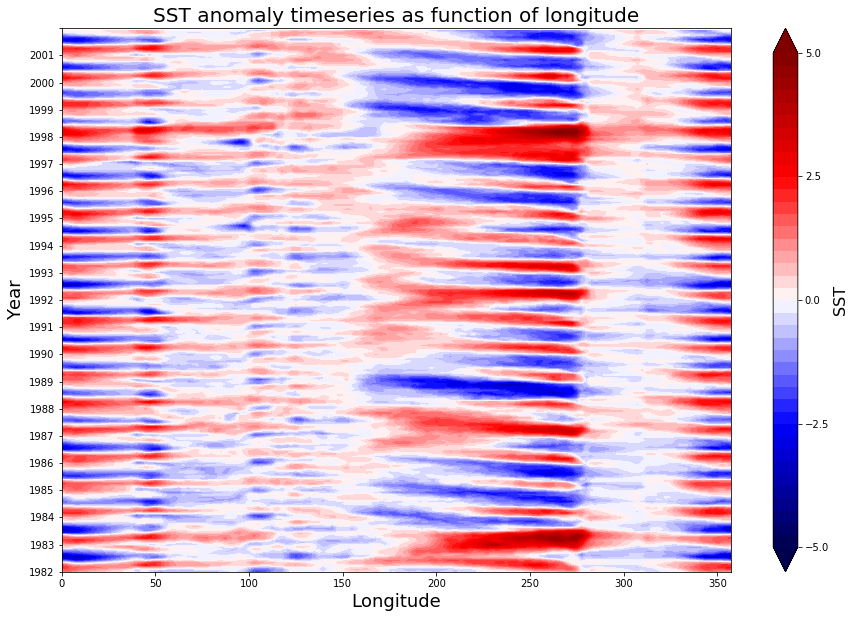

In [27]:
# plot timeseries of SST anomalies
fig=plt.figure(figsize=[15,10])
ax=fig.add_subplot(111)
cs = ax.contourf(lon,time,sst_anom,np.arange(-5,5+.25,.25),cmap='seismic',extend='both')
cb = plt.colorbar(cs,ticks=np.linspace(-5,5,5))
cb.set_label('SST',fontsize=16)
ax.set_yticks(np.arange(1,240+12,12))
ax.set_yticklabels(year_ticks)
ax.set_title('SST anomaly timeseries as function of longitude',fontsize=20)
ax.set_ylabel('Year',fontsize=18)
ax.set_xlabel('Longitude',fontsize=18)
plt.show()

### Covariance matrix vs correlation matrix

In [28]:
cormat = np.corrcoef( np.transpose(sst_anom.values) )
covmat = np.cov( np.transpose(sst_anom.values) )
print(cormat.shape,covmat.shape)

(144, 144) (144, 144)


[None]

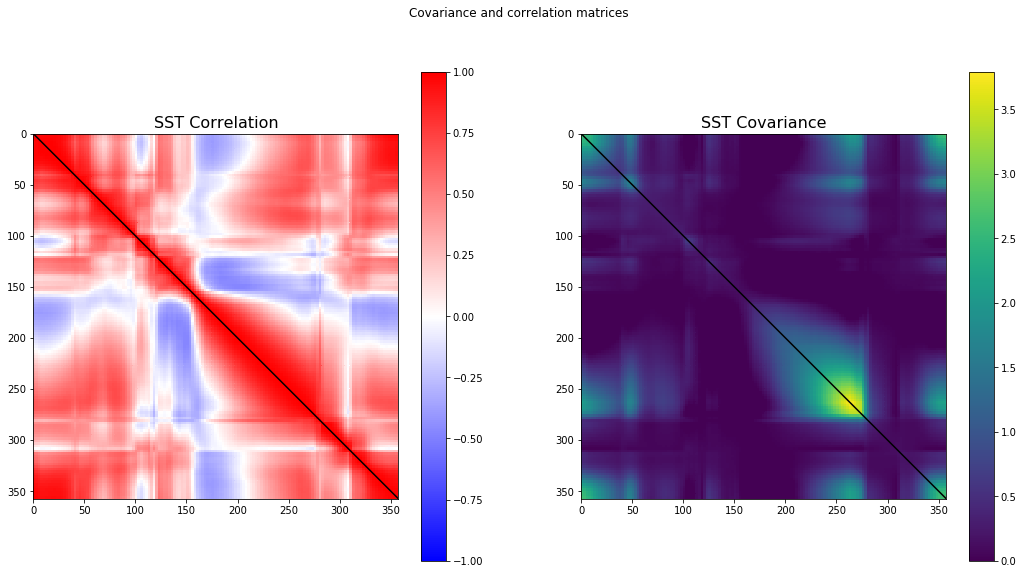

In [73]:
# correlation and covariance matrix
fig=plt.figure(figsize=[18,9])
fig.suptitle('Covariance and correlation matrices')

ax1=fig.add_subplot(121)
ax1.set_xlim([0,max(lon)])
ax1.set_ylim([max(lon),0])
ax1.plot([0,max(lon)],[0,max(lon)],'k')
cs1 = ax1.pcolor(lon,lon,cormat, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar(cs1)
ax1.set_title('SST Correlation',fontsize=16)
ax1.set(aspect='equal')

ax2=fig.add_subplot(122)
cs2 = ax2.pcolor(lon,lon,covmat,vmin=0)
ax2.plot([0,max(lon)],[0,max(lon)],'k')
ax2.set_xlim([0,max(lon)])
ax2.set_ylim([max(lon),0])
plt.colorbar(cs2)
ax2.set_title('SST Covariance',fontsize=16)
ax2.set(aspect='equal')

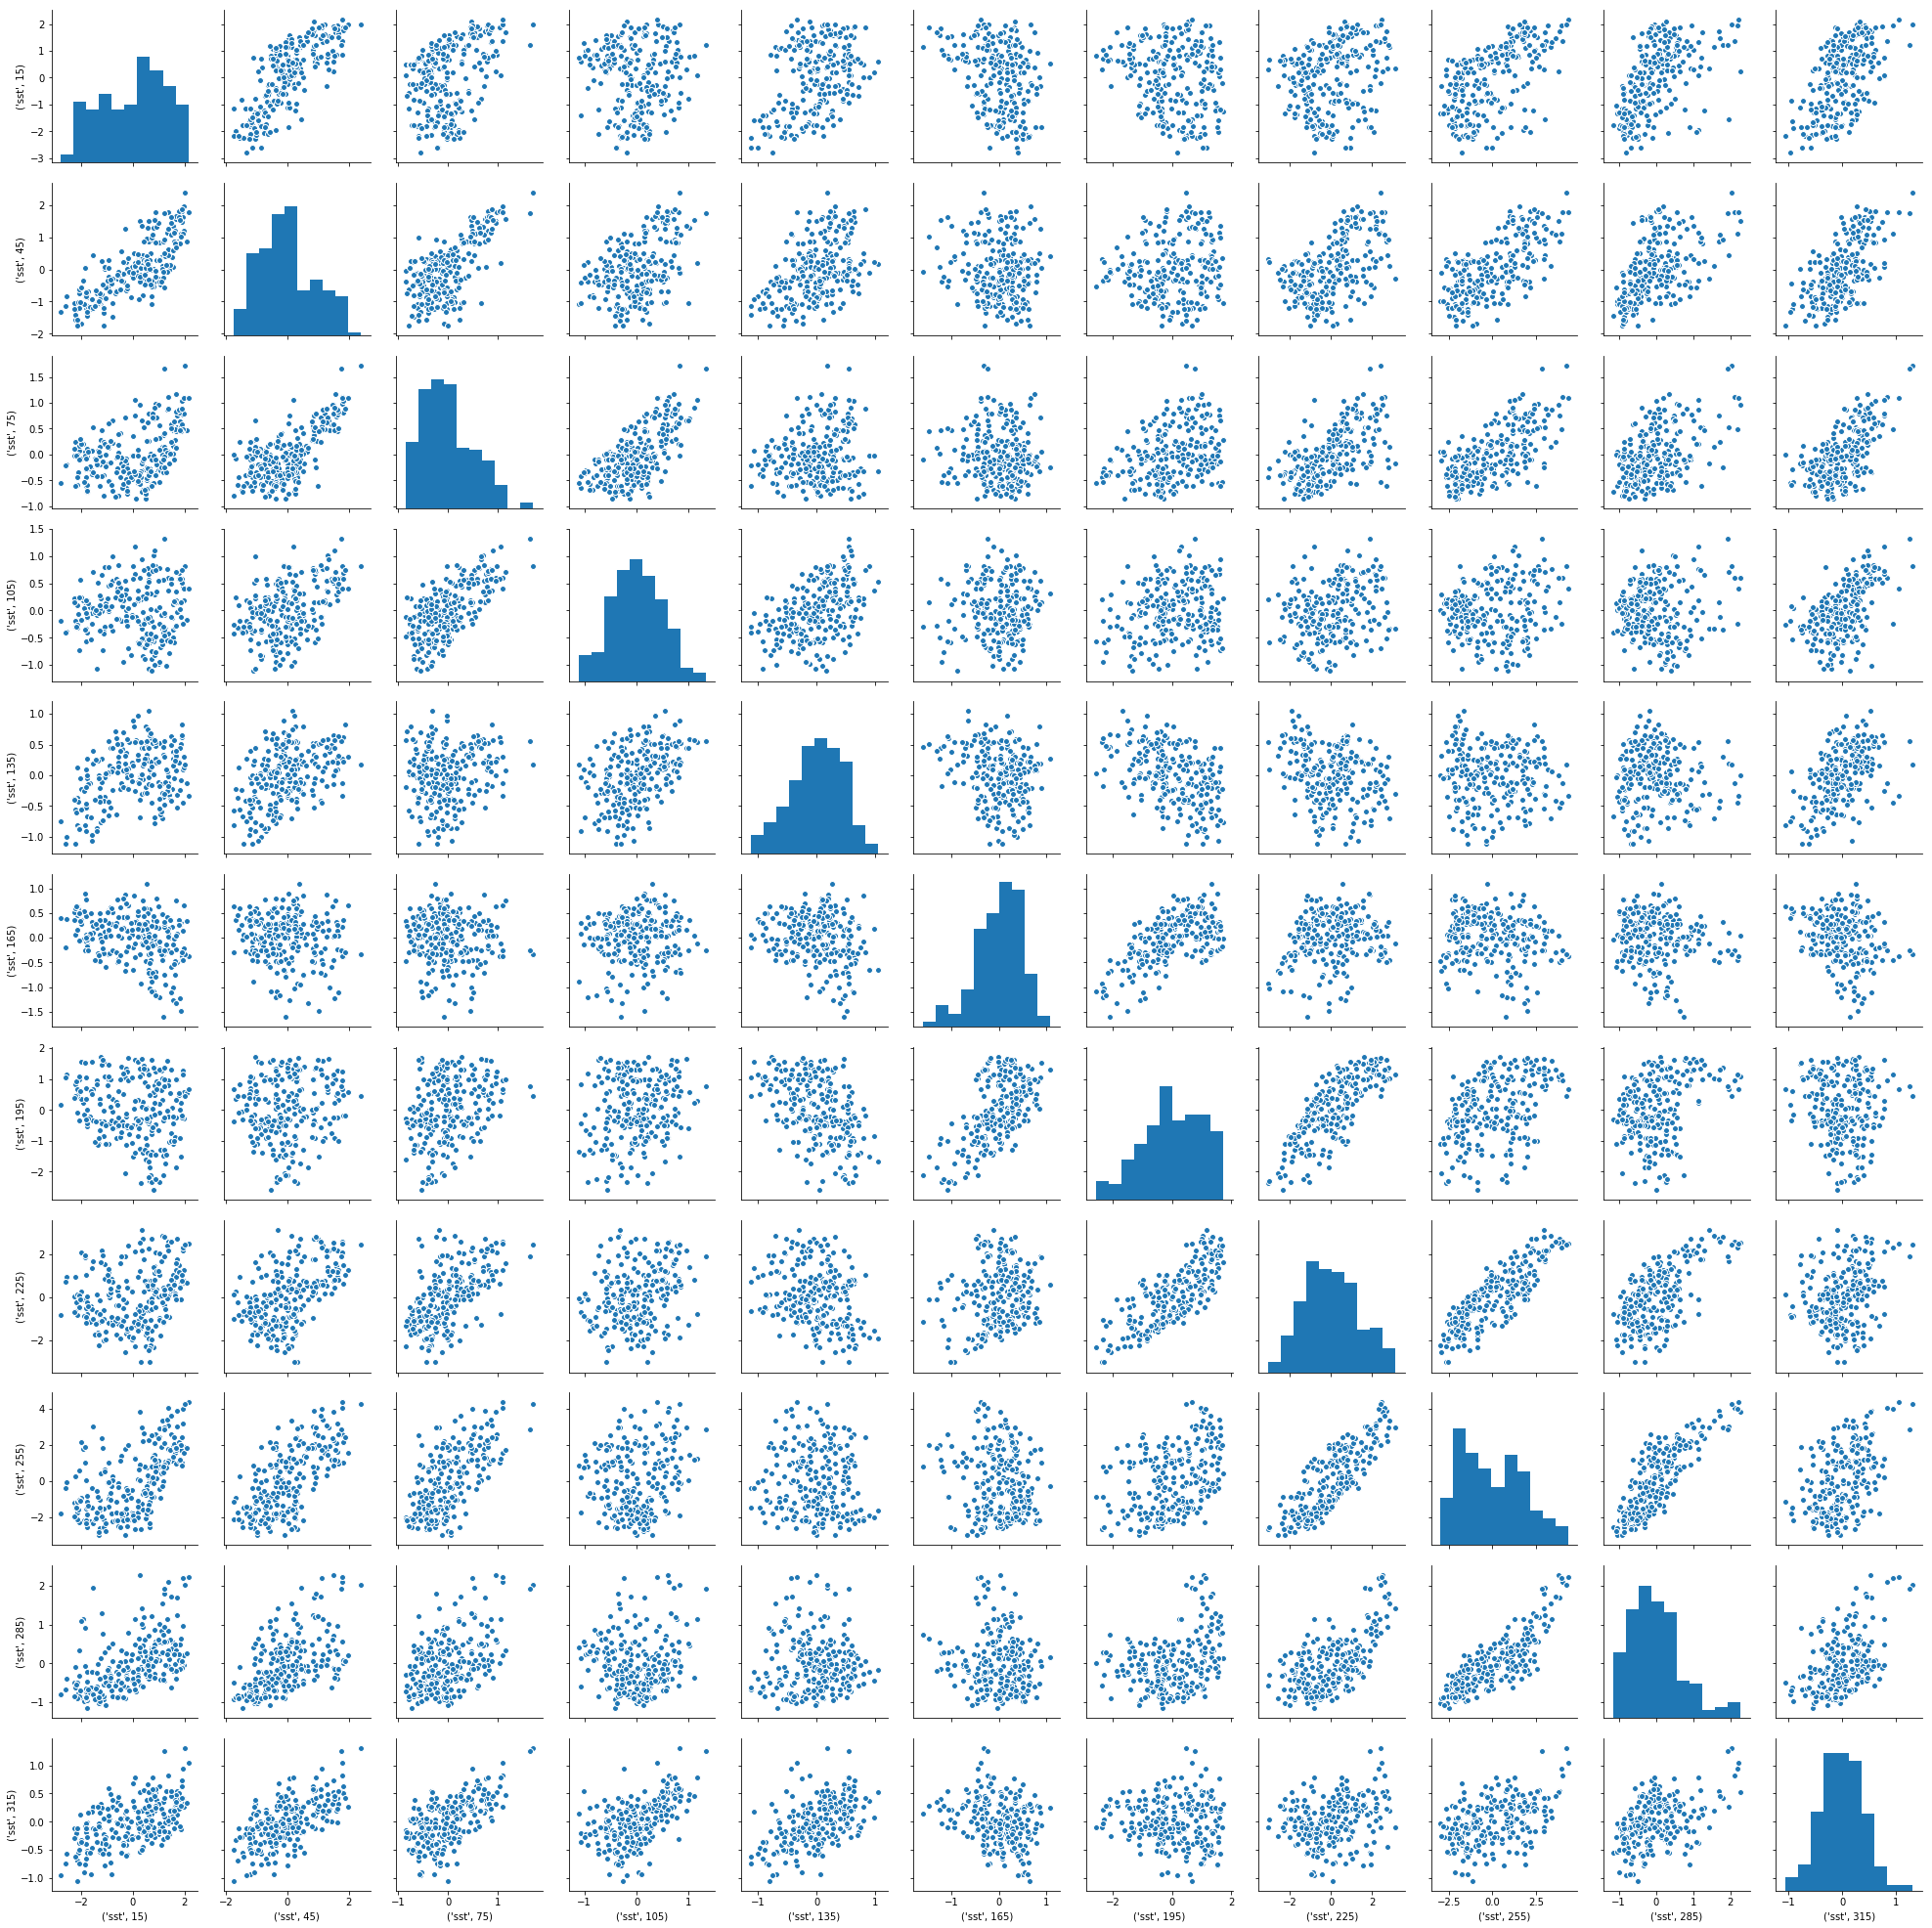

In [84]:
# Regrid sst_anom into 30 degree bands in longitude (15 of them)
lon_bnds = np.arange(0,360,30)
lon_cntr = np.arange(15,345,30)
SSTA30 = sst_anom.groupby_bins('lon',lon_bnds,labels=lon_cntr).mean(dim='lon')
df = SSTA30.to_dataframe().unstack()
sns.pairplot(df)

### Dividing into longitudinal chucks

Need to find a meaningful separation...
<br>
![alt text](http://www.compassdude.com/i/lat-lon-coordinate.gif "lon grid")

<br>
Let's try splitting up the ocean basins.


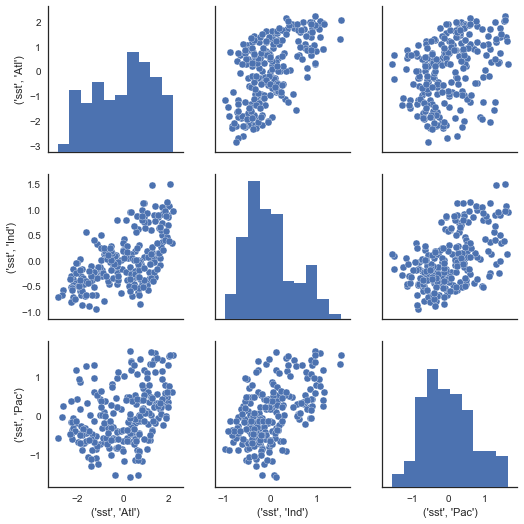

In [86]:
lon_bnds = [-40,30,130,310]
SSTA3 = sst_anom.groupby_bins('lon',lon_bnds,labels=['Atl','Ind','Pac']).mean(dim='lon')
df = SSTA3.to_dataframe().unstack()
sns.pairplot(df)

In [ ]:
# doesn't work! from https://seaborn.pydata.org/examples/pair_grid_with_kde.html

sns.set(style="white")
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.kdeplot, lw=2)